In [2]:
# import required libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models 

In [16]:
# generate training, validation, and test data
train_images = np.zeros((100, 50, 50, 1), dtype=np.float32)
train_coordinates = []
test_images = np.zeros((50, 50, 50, 1), dtype=np.float32)
test_coordinates = []
val_images = np.zeros((50, 50, 50, 1), dtype=np.float32)
val_coordinates = []

for i in range(100) : 
    x = np.random.randint(0, 50)
    y = np.random.randint(0, 50)
    train_images[i][x][y] = 1
    train_coordinates.append([x, y])

for i in range(50) :
    a = np.random.randint(0, 50)
    b = np.random.randint(0, 50)
    c = np.random.randint(0, 50)
    d = np.random.randint(0, 50)
    test_images[i][a][b] = 1
    test_coordinates.append([a, b])
    
    val_images[i][c][d] = 1
    val_coordinates.append([c, d])

train_coordinates = np.array(train_coordinates).astype(np.float32)
test_coordinates = np.array(test_coordinates).astype(np.float32)
val_coordinates = np.array(val_coordinates).astype(np.float32)

In [17]:
# Define the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2)) 

# Compile the model
model.compile(
    optimizer="adam", loss="mean_squared_error", metrics=["mean_absolute_error"]
)

In [18]:
# fit the model on training data
history = model.fit(train_images, train_coordinates, epochs=50, 
                    validation_data=(val_images, val_coordinates))

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 771.6745 - mean_absolute_error: 24.2064 - val_loss: 779.4475 - val_mean_absolute_error: 23.9069
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 731.2757 - mean_absolute_error: 23.2423 - val_loss: 597.0854 - val_mean_absolute_error: 19.9726
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 510.3287 - mean_absolute_error: 18.6258 - val_loss: 227.6729 - val_mean_absolute_error: 13.0938
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 248.3483 - mean_absolute_error: 13.5048 - val_loss: 229.7220 - val_mean_absolute_error: 13.1126
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 211.0417 - mean_absolute_error: 12.5122 - val_loss: 224.1014 - val_mean_absolute_error: 13.0741
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 222.0086 - mean_absolute_error: 12.4416 - val_loss: 202.9635 - val_mean_absolute_error: 12.5910
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 194.0244 - mean_absolute_

In [19]:
# Evaluate the model
test_loss, test_mae = model.evaluate(test_images, test_coordinates, verbose=2)
print(f'Test MAE: {test_mae}')

2/2 - 0s - 18ms/step - loss: 20.5543 - mean_absolute_error: 3.1841
Test MAE: 3.1840527057647705


In [20]:
# Make predictions
predictions = model.predict(test_images)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


In [21]:
# calculate the residual
x = test_coordinates[:,0] - predictions[:,0]
y = test_coordinates[:,1] - predictions[:,1]

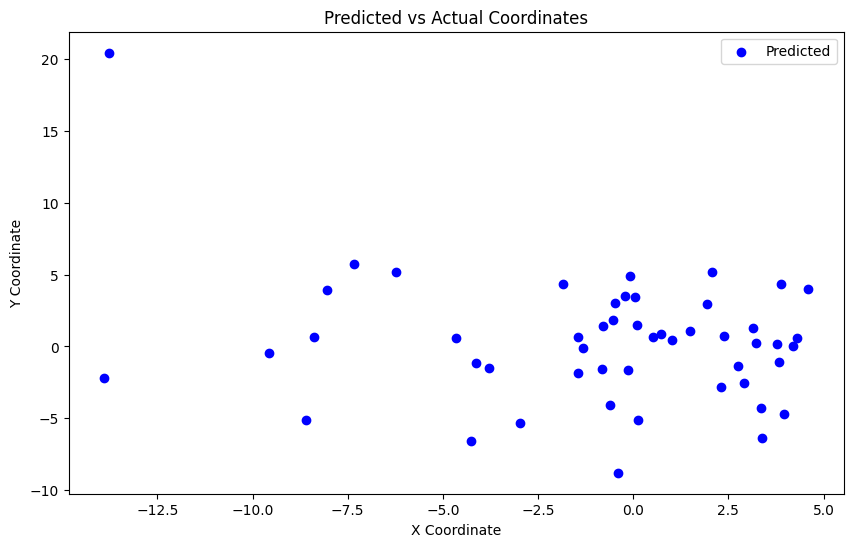

In [22]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Predicted')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Predicted vs Actual Coordinates')
plt.legend()
plt.show()